# Pruebas DTW

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

In [3]:
sequence1 = [0,1,2,1,3,4,3,2,1,0]
sequence2 = [1,4,0,0,1,2,2,4,3,0]

(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

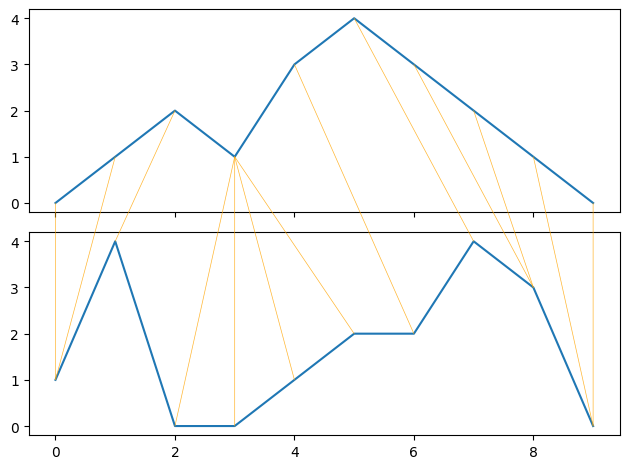

In [4]:
path = dtw.warping_path(sequence1, sequence2)
dtwvis.plot_warping(sequence1, sequence2, path, filename="warp.png")
dtwvis.plot_warping(sequence1, sequence2, path)

In [5]:
distance = dtw.distance(sequence1, sequence2)
print(distance)

3.3166247903554


In [6]:
distance, paths = dtw.warping_paths(sequence1, sequence2)
print("Distance =", distance)
best_path = dtw.best_path(paths)
print("best path =",best_path)
#np.set_printoptions(precision=3)
print(paths)

Distance = 3.3166247903554
best path = [(0, 0), (1, 0), (2, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 6), (5, 7), (6, 8), (7, 8), (8, 9), (9, 9)]
[[0.                inf        inf        inf        inf        inf
         inf        inf        inf        inf        inf]
 [       inf 1.         4.12310563 4.12310563 4.12310563 4.24264069
  4.69041576 5.09901951 6.4807407  7.14142843 7.14142843]
 [       inf 1.         3.16227766 3.31662479 3.46410162 3.46410162
  3.60555128 3.74165739 4.79583152 5.19615242 5.29150262]
 [       inf 1.41421356 2.23606798 3.         3.60555128 3.60555128
  3.46410162 3.46410162 4.         4.12310563 4.58257569]
 [       inf 1.41421356 3.31662479 2.44948974 2.64575131 2.64575131
  2.82842712 3.         4.24264069 4.47213595 4.24264069]
 [       inf 2.44948974 1.73205081 3.46410162 3.87298335 3.31662479
  2.82842712 3.         3.16227766 3.16227766 4.35889894]
 [       inf 3.87298335 1.73205081 4.35889894 5.29150262 4.47213595
  3.46410162 3.46410162 3.      

(<Figure size 1000x1000 with 4 Axes>, [<Axes: >, <Axes: >, <Axes: >, <Axes: >])

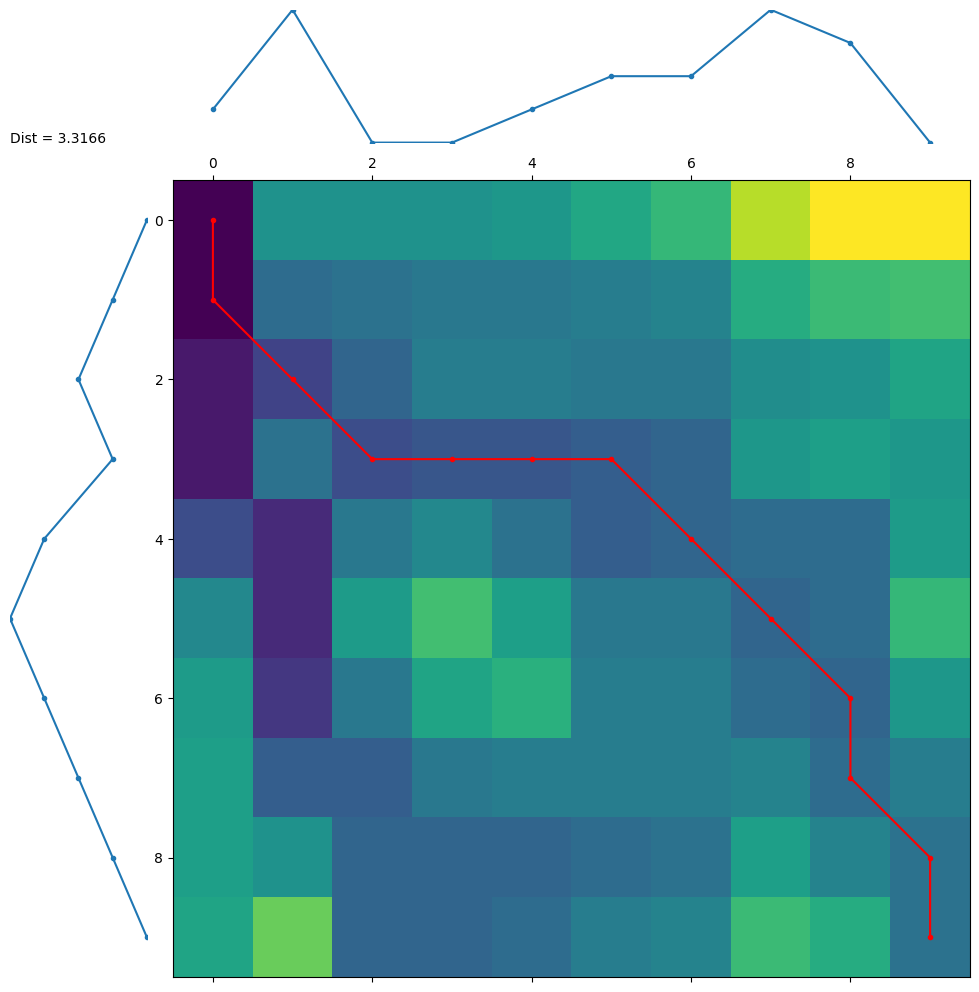

In [7]:
sequence1 = np.array(sequence1)
sequence2 = np.array(sequence2)
dtwvis.plot_warpingpaths(sequence1, sequence2, paths, best_path)

In [8]:
sequence1 = [1,2]
sequence2 = [1,2]
distance = dtw.distance(sequence1, sequence2)
print(distance)

sequence1 = [0,1,2,3]
sequence2 = [4,5,2,3]
distance = dtw.distance(sequence1, sequence2)
print(distance)

sequence1 = [0,1,2,3]
sequence2 = [2,3,2,3]
distance = dtw.distance(sequence1, sequence2)
print(distance)

sequence1 = [0,1,2,0]
sequence2 = [2,1,2,1]
distance = dtw.distance(sequence1, sequence2)
print(distance)


0.0
5.656854249492381
2.449489742783178
2.23606797749979
